In [2]:
!pip install jupyternotify
%load_ext jupyternotify

  Created wheel for jupyternotify: filename=jupyternotify-0.1.15-py3-none-any.whl size=8741 sha256=ef6cc2c139c6a937b055c2340074302894a29a63d443727048a235ba3090549a
  Stored in directory: c:\users\irza\appdata\local\pip\cache\wheels\18\31\59\466711d8f86811d1b57f55f114d0516419f0093435f41c65d9
Successfully built jupyternotify


<IPython.core.display.Javascript object>

In [38]:
%%notify
import codecs
import glob
import multiprocessing
import os
import pprint
import re
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

<IPython.core.display.Javascript object>

In [3]:
#nltk.download()

In [4]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IRZA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IRZA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
book_filenames= sorted(glob.glob('../../datatextml/*/*.txt'))
print(book_filenames)

['../../datatextml\\bible\\1954_TL_djvu.txt', '../../datatextml\\bible\\1974_TB_djvu.txt', '../../datatextml\\bible\\2008_MILT_djvu.txt', '../../datatextml\\cerpen\\Aisyah untuk Faaris.txt', '../../datatextml\\cerpen\\Aku, Kamu, dan Sahabatku !.txt', '../../datatextml\\cerpen\\Apakah Aku Sendiri.txt', '../../datatextml\\cerpen\\Ayahku dimana.txt', '../../datatextml\\cerpen\\Bertemu3PocongIdiot.txt', '../../datatextml\\cerpen\\Cara Mudah Terbebas Dari Jeratan Hutang.txt', '../../datatextml\\cerpen\\CerpenAdaApaDenganTradisi.txt', '../../datatextml\\cerpen\\CerpenAkuBukanSitiNurbaya.txt', '../../datatextml\\cerpen\\CerpenBalitaBertunangan.txt', '../../datatextml\\cerpen\\CerpenBerjalanMenjalani.txt', '../../datatextml\\cerpen\\CerpenBukanSekedarKencingBiasa.txt', '../../datatextml\\cerpen\\CerpenBungaBusuk.txt', '../../datatextml\\cerpen\\CerpenBusGaibkaryaKenHanggara.txt', '../../datatextml\\cerpen\\CerpenCaraMatiyangSulitDipercayakaryaKenHanggara.txt', '../../datatextml\\cerpen\\Cerpen

In [7]:
%%notify
corpus_raw = u''
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    try:
        with codecs.open(book_filename,"r", encoding="utf8") as book_file:
            corpus_raw += book_file.read()
    except Exception as e:
        print("Error reading", book_filename, e)
        pass
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading '../../datatextml\bible\1954_TL_djvu.txt'...
Corpus is now 5807441 characters long

Reading '../../datatextml\bible\1974_TB_djvu.txt'...
Corpus is now 11116369 characters long

Reading '../../datatextml\bible\2008_MILT_djvu.txt'...
Corpus is now 16718868 characters long

Reading '../../datatextml\cerpen\Aisyah untuk Faaris.txt'...
Error reading ../../datatextml\cerpen\Aisyah untuk Faaris.txt 'utf-8' codec can't decode byte 0x93 in position 505: invalid start byte
Corpus is now 16718868 characters long

Reading '../../datatextml\cerpen\Aku, Kamu, dan Sahabatku !.txt'...
Error reading ../../datatextml\cerpen\Aku, Kamu, dan Sahabatku !.txt 'utf-8' codec can't decode byte 0x93 in position 28: invalid start byte
Corpus is now 16718868 characters long

Reading '../../datatextml\cerpen\Apakah Aku Sendiri.txt'...
Error reading ../../datatextml\cerpen\Apakah Aku Sendiri.txt 'utf-8' codec can't decode byte 0xa0 in position 85: invalid start byte
Corpus is now 16718868 characters long

Re

Error reading ../../datatextml\cerpen\CerpenTangantanganBuntung.txt 'utf-8' codec can't decode byte 0x93 in position 1174: invalid start byte
Corpus is now 16799649 characters long

Reading '../../datatextml\cerpen\CerpenTerbaruLolonganTengahMalam.txt'...
Corpus is now 16800615 characters long

Reading '../../datatextml\cerpen\CerpenWarisanTerakhirKolektorGigikaryaKenHanggara.txt'...
Corpus is now 16808950 characters long

Reading '../../datatextml\cerpen\Cinta Pertama (Eps.2).txt'...
Error reading ../../datatextml\cerpen\Cinta Pertama (Eps.2).txt 'utf-8' codec can't decode byte 0xa0 in position 5491: invalid start byte
Corpus is now 16808950 characters long

Reading '../../datatextml\cerpen\Cinta Pertama (Eps.3).txt'...
Corpus is now 16856879 characters long

Reading '../../datatextml\cerpen\Cinta Pertama .txt'...
Error reading ../../datatextml\cerpen\Cinta Pertama .txt 'utf-8' codec can't decode byte 0xa0 in position 7842: invalid start byte
Corpus is now 16856879 characters long

Re

Error reading ../../datatextml\cerpen\TugasCerpenSingkatSahabatTerbaik.txt 'utf-8' codec can't decode byte 0x93 in position 1988: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpen\TugasMembuatCerpenTentangCinta.txt'...
Error reading ../../datatextml\cerpen\TugasMembuatCerpenTentangCinta.txt 'utf-8' codec can't decode byte 0x96 in position 3403: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpen\UnsurIntrinsikKaryaSastra.txt'...
Error reading ../../datatextml\cerpen\UnsurIntrinsikKaryaSastra.txt 'utf-8' codec can't decode byte 0xa0 in position 1111: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\10Juta.txt'...
Error reading ../../datatextml\cerpenmu\10Juta.txt 'utf-8' codec can't decode byte 0x93 in position 356: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\7PenggunaGelang.txt'...
Error reading ../../datatextml


Reading '../../datatextml\cerpenmu\DanSeterusnya.txt'...
Error reading ../../datatextml\cerpenmu\DanSeterusnya.txt 'utf-8' codec can't decode byte 0x93 in position 871: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\DarahKeabadian.txt'...
Error reading ../../datatextml\cerpenmu\DarahKeabadian.txt 'utf-8' codec can't decode byte 0x93 in position 720: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\DarimuAkuBelajar.txt'...
Error reading ../../datatextml\cerpenmu\DarimuAkuBelajar.txt 'utf-8' codec can't decode byte 0x93 in position 7646: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\DeathNote.txt'...
Error reading ../../datatextml\cerpenmu\DeathNote.txt 'utf-8' codec can't decode byte 0x91 in position 1133: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\DiBalikAwan.txt'...
Error reading ../../datatextml

Error reading ../../datatextml\cerpenmu\JiwaKlasik.txt 'utf-8' codec can't decode byte 0x93 in position 2695: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\JiwaYangGagal.txt'...
Error reading ../../datatextml\cerpenmu\JiwaYangGagal.txt 'utf-8' codec can't decode byte 0x97 in position 716: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\Kamu.txt'...
Error reading ../../datatextml\cerpenmu\Kamu.txt 'utf-8' codec can't decode byte 0xab in position 6088: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\KamudanDuniamu.txt'...
Error reading ../../datatextml\cerpenmu\KamudanDuniamu.txt 'utf-8' codec can't decode byte 0x93 in position 3829: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\KamulahCeritaTerindahku.txt'...
Error reading ../../datatextml\cerpenmu\KamulahCeritaTerindahku.txt 'utf-8' codec can't decode

Error reading ../../datatextml\cerpenmu\LariPart1.txt 'utf-8' codec can't decode byte 0x92 in position 521: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\LariPart2.txt'...
Error reading ../../datatextml\cerpenmu\LariPart2.txt 'utf-8' codec can't decode byte 0x93 in position 2259: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\LembayungSenjaDikalaHujan.txt'...
Error reading ../../datatextml\cerpenmu\LembayungSenjaDikalaHujan.txt 'utf-8' codec can't decode byte 0x93 in position 1334: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\LizAnUnusualLove.txt'...
Error reading ../../datatextml\cerpenmu\LizAnUnusualLove.txt 'utf-8' codec can't decode byte 0x93 in position 554: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\Lupa.txt'...
Error reading ../../datatextml\cerpenmu\Lupa.txt 'utf-8' codec can't decode b

Error reading ../../datatextml\cerpenmu\OrangDewasaPembolongPelipis.txt 'utf-8' codec can't decode byte 0x93 in position 1444: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\OurLoveStory.txt'...
Error reading ../../datatextml\cerpenmu\OurLoveStory.txt 'utf-8' codec can't decode byte 0x85 in position 717: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\PahitManisnyaPerjalananHidup.txt'...
Error reading ../../datatextml\cerpenmu\PahitManisnyaPerjalananHidup.txt 'utf-8' codec can't decode byte 0x93 in position 2269: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\PanduanBersosialisasiUntukAnakKuperPart1.txt'...
Error reading ../../datatextml\cerpenmu\PanduanBersosialisasiUntukAnakKuperPart1.txt 'utf-8' codec can't decode byte 0x93 in position 173: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\PanduanBerso

Error reading ../../datatextml\cerpenmu\SuratTanpaTuan.txt 'utf-8' codec can't decode byte 0x93 in position 139: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\SuratUndanganH3Part1.txt'...
Error reading ../../datatextml\cerpenmu\SuratUndanganH3Part1.txt 'utf-8' codec can't decode byte 0x93 in position 811: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\TableNo5.txt'...
Error reading ../../datatextml\cerpenmu\TableNo5.txt 'utf-8' codec can't decode byte 0x93 in position 898: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\TakBernyawa.txt'...
Error reading ../../datatextml\cerpenmu\TakBernyawa.txt 'utf-8' codec can't decode byte 0x93 in position 411: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\cerpenmu\TakPantaskahCintaUntukku.txt'...
Error reading ../../datatextml\cerpenmu\TakPantaskahCintaUntukku.txt 'utf-8'

Error reading ../../datatextml\en_quotes\quotes.txt 'utf-8' codec can't decode byte 0x93 in position 8: invalid start byte
Corpus is now 16964085 characters long

Reading '../../datatextml\id_quotes\id_quotes.txt'...
Corpus is now 17147662 characters long

Reading '../../datatextml\indonesian-wordlist\bbalet_stopwords_id.txt'...
Corpus is now 17151054 characters long

Reading '../../datatextml\indonesian-wordlist\gh-stopwords-json-id.txt'...
Corpus is now 17153733 characters long

Reading '../../datatextml\indonesian-wordlist\id.stopwords.02.01.2016.txt'...
Corpus is now 17160179 characters long

Reading '../../datatextml\indonesian-wordlist\indonesian-stopwords-complete.txt'...
Corpus is now 17166625 characters long

Reading '../../datatextml\indonesian-wordlist\ranksnl-indonesian.txt'...
Corpus is now 17169320 characters long

Reading '../../datatextml\quran\id.indonesian.txt'...
Corpus is now 18292023 characters long

Reading '../../datatextml\subscene\(Hijau) Anon-2018-Semua-WebDL-

Corpus is now 20097198 characters long

Reading '../../datatextml\subscene\4.srt.txt'...
Corpus is now 20135736 characters long

Reading '../../datatextml\subscene\40.txt'...
Corpus is now 20166255 characters long

Reading '../../datatextml\subscene\41.txt'...
Corpus is now 20210857 characters long

Reading '../../datatextml\subscene\42(1).txt'...
Corpus is now 20250365 characters long

Reading '../../datatextml\subscene\43.txt'...
Corpus is now 20296183 characters long

Reading '../../datatextml\subscene\44.txt'...
Corpus is now 20339658 characters long

Reading '../../datatextml\subscene\45.txt'...
Corpus is now 20382206 characters long

Reading '../../datatextml\subscene\46.txt'...
Corpus is now 20415965 characters long

Reading '../../datatextml\subscene\47.txt'...
Corpus is now 20464327 characters long

Reading '../../datatextml\subscene\48.txt'...
Corpus is now 20507200 characters long

Reading '../../datatextml\subscene\49.txt'...
Corpus is now 20555721 characters long

Reading 

Corpus is now 22320451 characters long

Reading '../../datatextml\subscene\Chasing.Valentine.2018.720p.AMZN.WEB-DL.DDP2.0.H.264-NTG.srt.txt'...
Corpus is now 22339037 characters long

Reading '../../datatextml\subscene\Cheese in the Trap (2018).srt.txt'...
Corpus is now 22377602 characters long

Reading '../../datatextml\subscene\Chef & My Fridge (2018) ep 182.srt.txt'...
Corpus is now 22433136 characters long

Reading '../../datatextml\subscene\Children of a Lesser God E08.srt.txt'...
Corpus is now 22462743 characters long

Reading '../../datatextml\subscene\Cinderella Chef S1 EP01.srt.txt'...
Corpus is now 22479560 characters long

Reading '../../datatextml\subscene\Cinderella%20Chef%20S1%20EP03.srt.txt'...
Corpus is now 22500324 characters long

Reading '../../datatextml\subscene\Clean Bandit - Rockabye ft. Sean Paul & Anne-Marie [Official Video].srt.txt'...
Corpus is now 22504133 characters long

Reading '../../datatextml\subscene\Cobra Kai Season 01 Episode 01 - Ace Degenerate.srt

Corpus is now 23814321 characters long

Reading '../../datatextml\subscene\Episode 11 Conspiracy Weary.srt.txt'...
Corpus is now 23830241 characters long

Reading '../../datatextml\subscene\Episode 12 Looking for Mr. Goodbrain (1).srt.txt'...
Corpus is now 23830241 characters long

Reading '../../datatextml\subscene\Episode 13 Looking for Mr. Goodbrain, Part 2.srt.txt'...
Corpus is now 23830241 characters long

Reading '../../datatextml\subscene\Episode 2 Zombie Knows Best.srt.txt'...
Corpus is now 23854663 characters long

Reading '../../datatextml\subscene\Episode 3 Eat, Pray, Liv.srt.txt'...
Corpus is now 23876106 characters long

Reading '../../datatextml\subscene\Episode 4 Wag the Tongue Slowly.srt.txt'...
Corpus is now 23898582 characters long

Reading '../../datatextml\subscene\Episode 5 Spanking the Zombie.srt.txt'...
Corpus is now 23921057 characters long

Reading '../../datatextml\subscene\Episode 6 Some Like It Hot Mess.srt.txt'...
Corpus is now 23945544 characters long

Rea

Corpus is now 25676550 characters long

Reading '../../datatextml\subscene\Hong.Kong.Rescue.2018.1080p.WEB-DL.broth3rmax.srt.txt'...
Corpus is now 25703698 characters long

Reading '../../datatextml\subscene\Hostiles.2017.720p.BluRay.x264-GECKOS.srt.txt'...
Corpus is now 25723363 characters long

Reading '../../datatextml\subscene\Hot.Girls.Wanted.2015.720p.WEBRip.600MB.MkvCage.srt.txt'...
Corpus is now 25752341 characters long

Reading '../../datatextml\subscene\House.Of.Evil.2017.DVDRip.x264-SPOOKS.srt.txt'...
Corpus is now 25765382 characters long

Reading '../../datatextml\subscene\Hwang.Jin.Yi.2006.E01.HDTV.srt.txt'...
Corpus is now 25782873 characters long

Reading '../../datatextml\subscene\Hwang.Jin.Yi.2006.E02.HDTV.srt.txt'...
Corpus is now 25800109 characters long

Reading '../../datatextml\subscene\Hwang.Jin.Yi.2006.E03.HDTV.srt.txt'...
Corpus is now 25815808 characters long

Reading '../../datatextml\subscene\Hwang.Jin.Yi.2006.E04.HDTV.srt.txt'...
Corpus is now 25838429 cha

Corpus is now 27445127 characters long

Reading '../../datatextml\subscene\Lawless.2012.All.BluRayRip.720p.1080p.and.Ganool.dunia-lebah.blogspot.com.with.Ervanders.srt.txt'...
Corpus is now 27469222 characters long

Reading '../../datatextml\subscene\Lazer.Team.2.2018.720p.BLURAY.srt.txt'...
Corpus is now 27508998 characters long

Reading '../../datatextml\subscene\Lean on Pete.srt.txt'...
Corpus is now 27538346 characters long

Reading '../../datatextml\subscene\Legend of the Condor Heroes 1983 Episode 21 Indonesia.srt.txt'...
Corpus is now 27552619 characters long

Reading '../../datatextml\subscene\Legion.S02E03.HDTV.[nerdian]srt.srt.txt'...
Corpus is now 27563814 characters long

Reading '../../datatextml\subscene\Lion_Pride_Episode_15.srt.txt'...
Corpus is now 27605038 characters long

Reading '../../datatextml\subscene\Little House in the Woods E01.id.srt.txt'...
Corpus is now 27629484 characters long

Reading '../../datatextml\subscene\Little.Forest.2018.HDRip.FHDRip.H264.AAC-No

Corpus is now 29231302 characters long

Reading '../../datatextml\subscene\My.Mister.E07.180411.720p-NAD.srt.txt'...
Corpus is now 29253281 characters long

Reading '../../datatextml\subscene\My.Mister.E08.180412.720p-NAD.srt.txt'...
Corpus is now 29275580 characters long

Reading '../../datatextml\subscene\My.Mister.E09.180418.720p-NAD.srt.txt'...
Corpus is now 29298742 characters long

Reading '../../datatextml\subscene\My.Mister.E10.180419.720p-NAD.srt.txt'...
Corpus is now 29318891 characters long

Reading '../../datatextml\subscene\MySunshine-03.srt.txt'...
Corpus is now 29342650 characters long

Reading '../../datatextml\subscene\Mysterious Personal Shopper ep 36.srt.txt'...
Corpus is now 29356876 characters long

Reading '../../datatextml\subscene\Never.Back.Down.2.The.Beatdown.2011.720p.AMZN.WEB-DL.DD5.1.H264.srt.txt'...
Corpus is now 29387154 characters long

Reading '../../datatextml\subscene\Nobody.Knows.2004.720p.BluRay.x264-Pahe.in.srt.txt'...
Corpus is now 29405563 charac

Corpus is now 30814372 characters long

Reading '../../datatextml\subscene\Radio Star (2018) ep 565.srt.txt'...
Corpus is now 30881468 characters long

Reading '../../datatextml\subscene\Rampage.2018.720p.HDCAM.700MB.SHERiF.srt.txt'...
Corpus is now 30903581 characters long

Reading '../../datatextml\subscene\Ready Player One.srt.txt'...
Corpus is now 30941275 characters long

Reading '../../datatextml\subscene\Revenge.2017.HDRip.AC3.X264-CMRG..srt.txt'...
Corpus is now 30945887 characters long

Reading '../../datatextml\subscene\Rich.Family s.Son.E14.srt.txt'...
Corpus is now 30955066 characters long

Reading '../../datatextml\subscene\Ringu.2.1999.720p.Bluray.x264.800MB-Pahe.in.srt.txt'...
Corpus is now 30966568 characters long

Reading '../../datatextml\subscene\Riverdale.US.S02E20.Chapter.Thirty.Tree-Shadow.Of.A.Doubt.srt.txt'...
Corpus is now 30981739 characters long

Reading '../../datatextml\subscene\Rukh (2017) (HDRip) (AlifAkbarBadarudien).srt.txt'...
Corpus is now 31016013 ch

Corpus is now 32563309 characters long

Reading '../../datatextml\subscene\Something in The Rain  E05.srt.txt'...
Corpus is now 32584906 characters long

Reading '../../datatextml\subscene\Sonu Ke Titu Ki Sweety (2018) (HDRip) (AlifAkbarBadarudien).srt.txt'...
Corpus is now 32663612 characters long

Reading '../../datatextml\subscene\Star Trek Enterprise - 1x01&02 - Broken Bow (BluRay-RaZz!).kakeksanjata.srt.txt'...
Corpus is now 32698721 characters long

Reading '../../datatextml\subscene\Status Update.srt.txt'...
Corpus is now 32740124 characters long

Reading '../../datatextml\subscene\Stephanie.2017.720p.WEB-DL.iExTV.srt.txt'...
Corpus is now 32752299 characters long

Reading '../../datatextml\subscene\Stranger.Things.S02E01.Mad.Max.Semua.Fixed.srt.txt'...
Corpus is now 32767752 characters long

Reading '../../datatextml\subscene\Submergence.2018.720p.BluRay.DTS-HD.MA.5.1.x264-MTeam.srt.txt'...
Corpus is now 32790752 characters long

Reading '../../datatextml\subscene\Sugar.Mountai

Corpus is now 34122330 characters long

Reading '../../datatextml\subscene\The.Boss.Baby.Back.in.Business.S01E07.720p.web.hevc.x265.rmteam - Dev Hamid Studio.srt.txt'...
Corpus is now 34133689 characters long

Reading '../../datatextml\subscene\The.Boss.Baby.Back.in.Business.S01E08.720p.web.hevc.x265.rmteam - Dev Hamid Studio.srt.txt'...
Corpus is now 34144977 characters long

Reading '../../datatextml\subscene\The.Boss.Baby.Back.in.Business.S01E09.720p.web.hevc.x265.rmteam - Dev Hamid Studio.srt.txt'...
Corpus is now 34157380 characters long

Reading '../../datatextml\subscene\The.Boss.Baby.Back.in.Business.S01E10.720p.web.hevc.x265.rmteam - Dev Hamid Studio.srt.txt'...
Corpus is now 34169758 characters long

Reading '../../datatextml\subscene\The.Boss.Baby.Back.in.Business.S01E11.720p.web.hevc.x265.rmteam - Dev Hamid Studio.srt.txt'...
Corpus is now 34181597 characters long

Reading '../../datatextml\subscene\The.Boss.Baby.Back.in.Business.S01E12.720p.web.hevc.x265.rmteam - Dev Hamid

Corpus is now 35574301 characters long

Reading '../../datatextml\subscene\Wanderland.2017.WEB-DL.x264-FGT.srt.txt'...
Corpus is now 35593065 characters long

Reading '../../datatextml\subscene\Weekly.Idol.E351.180418.EXID.srt.txt'...
Corpus is now 35623003 characters long

Reading '../../datatextml\subscene\Westworld.02x01.Journey.Into.Night.DEFLATE.[nerdian].srt.txt'...
Corpus is now 35637911 characters long

Reading '../../datatextml\subscene\What a wonderful family 2017 480p x264 AAC - fauzi_highbury.srt.txt'...
Corpus is now 35683220 characters long

Reading '../../datatextml\subscene\When_We_Were_Young_01.id.srt.txt'...
Corpus is now 35707749 characters long

Reading '../../datatextml\subscene\Where.I.Belong.2017.BluRay.720p-Ganool--fauzi_highbury.srt.txt'...
Corpus is now 35734363 characters long

Reading '../../datatextml\subscene\Where.the.Skin.Lies.2017.HDRip.XviD.AC3-EVO.srt.txt'...
Corpus is now 35751750 characters long

Reading '../../datatextml\subscene\White.Rose.Campus.

Corpus is now 37263451 characters long

Reading '../../datatextml\subscene\[teks putih] Urban Legends - Final Cut (2000)_BluRay.Arytoon.id.srt.txt'...
Corpus is now 37286602 characters long

Reading '../../datatextml\subscene\___ ___.E28.180408.720p-NEXT.srt.txt'...
Corpus is now 37330763 characters long

Reading '../../datatextml\subscene\___(IZ)_ANGEL MV.srt.txt'...
Corpus is now 37331013 characters long

Reading '../../datatextml\subscene\____ (CROSS GENE) - ____ touch it Official M-V.srt.txt'...
Corpus is now 37331268 characters long

Reading '../../datatextml\subscene\____ SPECTRUM - ___ Light it up Official M-V.srt.txt'...
Corpus is now 37331528 characters long

Reading '../../datatextml\subscene\deadpool 2 Indonesian.srt.txt'...
Corpus is now 37369897 characters long

Reading '../../datatextml\subscene\eps01.srt.txt'...
Corpus is now 37382186 characters long

Reading '../../datatextml\subscene\eps02.srt.txt'...
Corpus is now 37393824 characters long

Reading '../../datatextml\su

<IPython.core.display.Javascript object>

In [8]:
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [9]:
%%notify
raw_sentences = tokenizer.tokenize(corpus_raw)

<IPython.core.display.Javascript object>

In [10]:
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [11]:
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [12]:
token_count = sum([len(sentence) for sentence in sentences])
print('Buku mempunyai {0:,} tokens'.format(token_count))

Buku mempunyai 7,873,673 tokens


# Train Word2Vec

In [13]:
#TRAIN THIS - DISTANCE,SIMILARITIES, RANK

#Dimensionality- makin banyak makin lama komputasi, makin detail
num_features = 300  #300

min_word_count = 3

num_workers = multiprocessing.cpu_count()

context_size = 7

downsampling = 1e-3

seed = 1

In [14]:
tex2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers = num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [15]:
tex2vec.build_vocab(sentences)

In [16]:
print("Anda memiliki panjang vocab: {0}".format(len(tex2vec.wv.vocab)))

Anda memiliki panjang vocab: 53933


In [17]:
tex2vec.corpus_count

1166792

In [18]:
%%notify
#tex2vec.train(sentences,total_words=42335, epochs=200)
tex2vec.train(sentences, total_words=1043104, epochs=30)

(193767360, 236210190)

<IPython.core.display.Javascript object>

In [19]:
if not os.path.exists('trained'):
    os.makedirs('trained')

# SAVE MODEL

In [20]:
import os
import gensim
tex2vec.save('../models/chat_model2-300.w2v')

# Loading W2V MODEL

In [21]:
import gensim
tex2vec =  gensim.models.KeyedVectors.load("../models/chat_model2-300.w2v")

In [22]:
tex2vec.wv.vocab['browsing'].index

15517

In [23]:
tex2vec.most_similar("informasi")

E:\anaconda3\envs\374\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('Mok', 0.44485318660736084),
 ('Dumont', 0.4381742477416992),
 ('data', 0.4287201762199402),
 ('komitemu', 0.42504867911338806),
 ('kontaknya', 0.4210323393344879),
 ('Sire', 0.4154973328113556),
 ('Lala', 0.41128963232040405),
 ('Honeycutt', 0.4103649854660034),
 ('audit', 0.4096997380256653),
 ('asbes', 0.4075703024864197)]

In [24]:
import sklearn.manifold
#t sthocastic distributed neighbor embedding or PCA
# video: how to visualize dataset easily
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [25]:
all_word_vector_matrix = tex2vec.trainables.vectors_lockf

In [26]:
#AWAS LAMA BRO
all_word_vector_matrix_2d = tsne.fit_transform(all_word_vector_matrix.reshape((-1, 1)))

E:\anaconda3\envs\374\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
E:\anaconda3\envs\374\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [30]:
import pandas as pd
points = pd.DataFrame(
    [
        (word,coords[0], coords[1])
        for word, coords in [
            (word, all_word_vector_matrix_2d[tex2vec.wv.vocab[word].index])
            for word in tex2vec.wv.vocab
        ]
        
    ],
    columns = ['word','x','y']
)

In [31]:
points.head()

,word,x,y
0,file,-0.362809,1.736735
1,DI,0.709835,0.720288
2,STAF,0.838115,-0.193760
3,BILLY,-0.255033,-0.561356
4,PROJECT,0.192672,0.116381


In [35]:
points.to_records("../tmp/records.rec")

rec.array([(    0, 'file', -0.36280927,  1.7367351 ),
           (    1, 'DI',  0.70983475,  0.7202876 ),
           (    2, 'STAF',  0.83811486, -0.1937595 ), ...,
           (53930, 'flossing', -1.0309299 , -0.4871641 ),
           (53931, 'Valencia',  0.01007766,  0.13679221),
           (53932, 'Soto', -0.9088959 ,  0.45824027)],
          dtype=[('index', '<i8'), ('word', 'O'), ('x', '<f4'), ('y', '<f4')])

In [34]:
points.to_csv("../tmp/first_model2.csv")

In [36]:
points.to_pickle("../tmp/points.pickle")

In [39]:
sns.set_context('poster')

<AxesSubplot:xlabel='x', ylabel='y'>

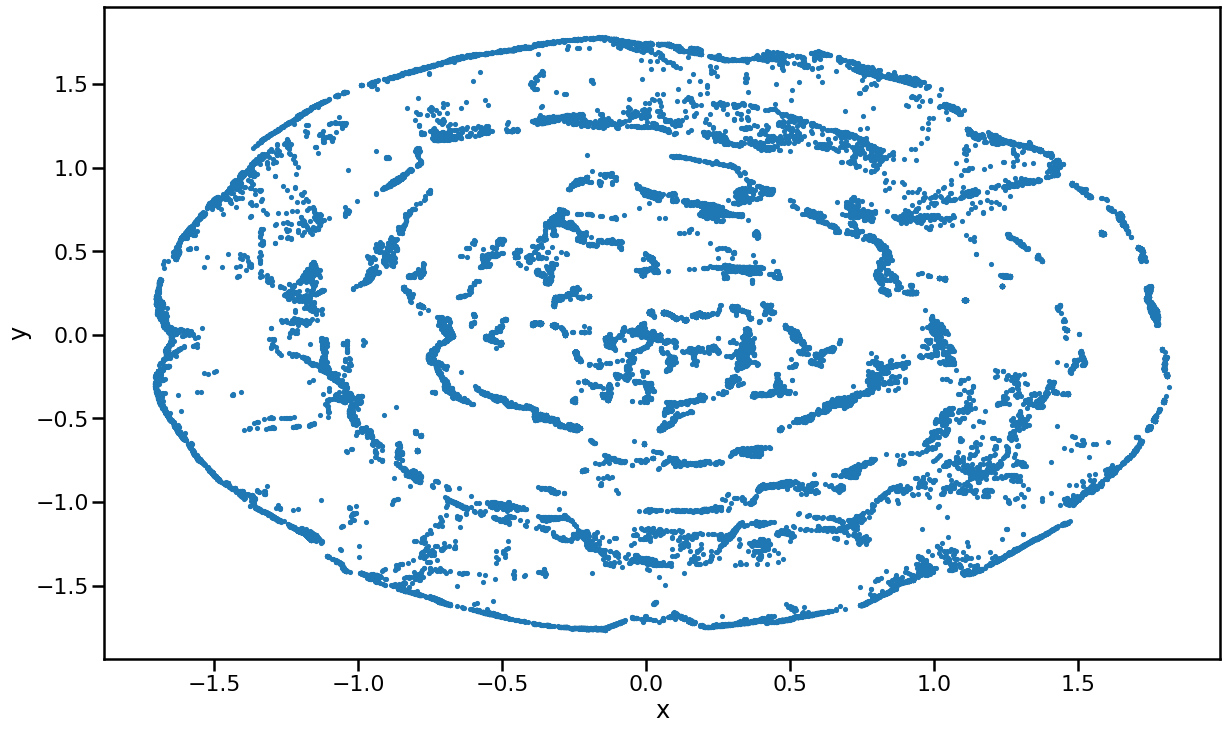

In [40]:
points.plot.scatter('x','y',s=10,figsize=(20,12))

In [41]:
def plot_region(x_bounds, y_bounds):
    
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=30, figsize=(18, 12))
    for i, point in slice.iterrows():
        ax.text(point.x , point.y, point.word, fontsize=11)

In [42]:
def getword(word):
    x = float(points.loc[points['word']==word]['x'].values)
    y = float(points.loc[points['word']==word]['y'].values)
    print(x,y)
    x_min = x - 0.001
    x_max = x + 0.001
    y_min = y - 0.001
    y_max = y + 0.001
    plot_region(x_bounds=(x_min,x_max), y_bounds=(y_min,y_max))
    

0.8031768202781677 0.5568057298660278


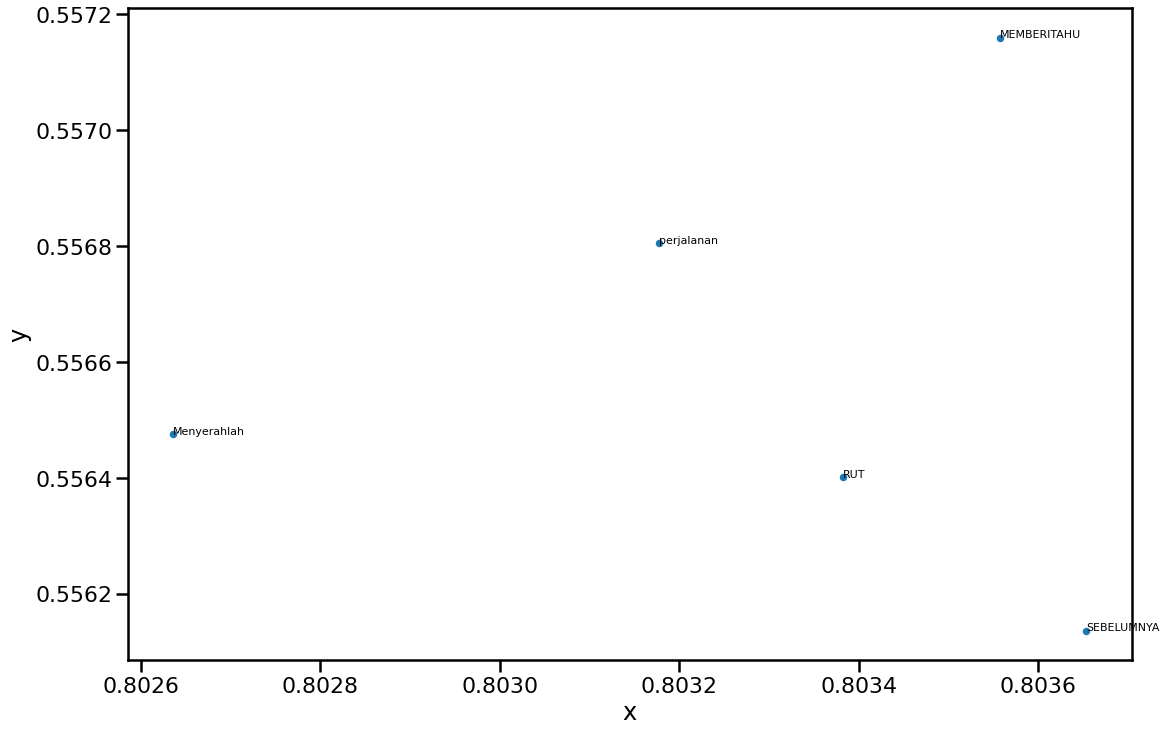

In [47]:
getword('perjalanan')

array([0.72703606])

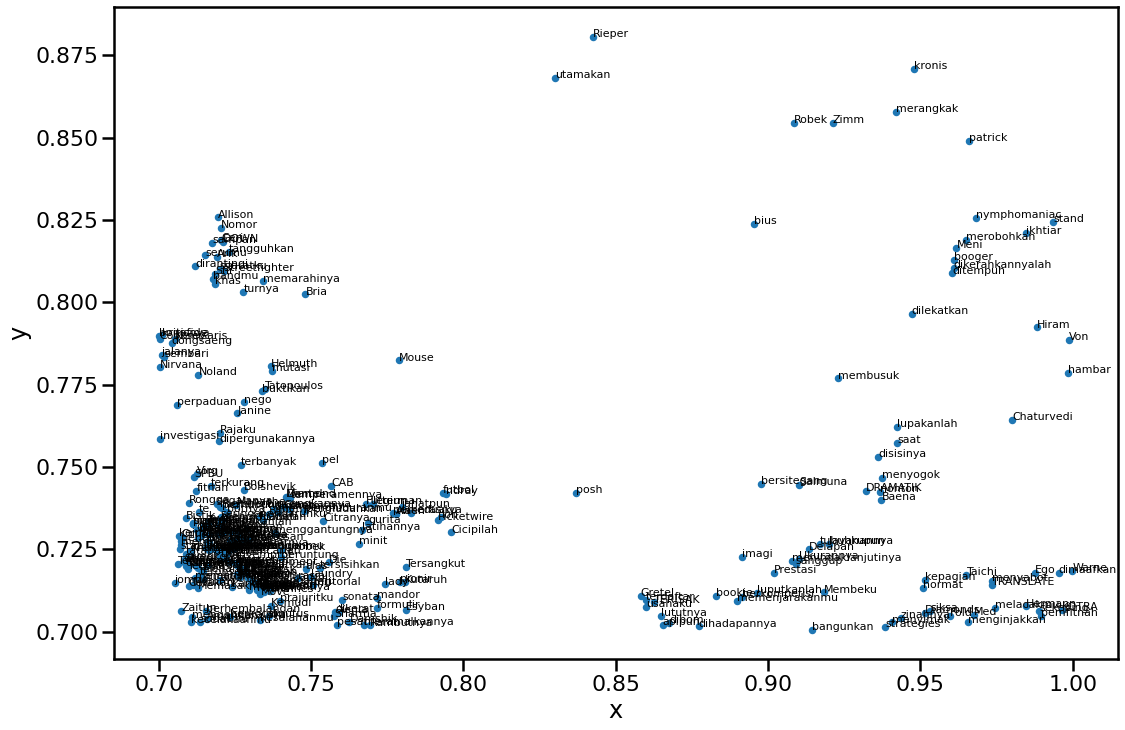

In [48]:
plot_region(x_bounds=(0.7, 1.0), y_bounds=(0.7, 0.9))

In [49]:
slice.head()

AttributeError: type object 'slice' has no attribute 'head'

In [162]:
myvec = tex2vec['']

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


KeyError: "word '' not in vocabulary"

In [50]:
myvec = tex2vec.wv.word_vec("anak")

In [51]:
myvec

array([-1.28565237e-01, -1.79227889e-01,  4.37333016e-03,  5.46311066e-02,
        2.95232117e-01,  2.80933172e-01, -6.05989993e-01, -2.71516442e-01,
        2.97946744e-02,  7.83183239e-03,  2.47993514e-01, -6.06030039e-02,
        1.44244477e-01, -7.48957619e-02, -8.29373077e-02, -1.61129326e-01,
       -4.32328396e-02, -2.83870429e-01,  2.46926740e-01, -1.28836051e-01,
        1.28139704e-01,  2.41757125e-01, -3.57309915e-02, -2.95680821e-01,
        5.18287122e-02,  5.58762491e-01, -4.99777147e-04, -1.25683993e-01,
        4.79977429e-02,  2.17972517e-01, -2.51133256e-02, -8.75015091e-03,
       -1.65862553e-02, -1.39298856e-01, -1.77256361e-01,  4.05417234e-01,
        2.07700029e-01,  4.30419028e-01,  1.75721928e-01, -1.95415154e-01,
       -6.66617230e-02, -2.88192272e-01, -2.08515506e-02,  2.07584530e-01,
        1.98817849e-01,  2.83399988e-02,  3.63032222e-01, -2.18726069e-01,
        3.33086729e-01, -4.74103168e-03, -1.49091795e-01, -4.18520235e-02,
       -3.11697312e-02, -

In [163]:
#cari pake vector yang ada
tex2vec.wv.most_similar(positive=[myvec],topn=1)

[('anak', 1.0000001192092896)]

In [144]:
tex2vec.similar_by_word("subtitle")

C:\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  """Entry point for launching an IPython kernel.


[('translate', 0.9905929565429688),
 ('irene', 0.9883977770805359),
 ('english', 0.9866872429847717),
 ('talk', 0.9863124489784241),
 ('dont', 0.9857357740402222),
 ('yts', 0.9840521812438965),
 ('subtitles', 0.9817236661911011),
 ('cheaper', 0.980956494808197),
 ('wants', 0.9808217287063599),
 ('ask', 0.9806349873542786)]

In [42]:
#Hubungan Linear dari sebuah kata

In [52]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = tex2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2


In [62]:
nearest_similarity_cosmul("saya", "primer", "pergi")

saya is related to primer, as Anda is related to pergi


E:\anaconda3\envs\374\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


'Anda'

In [54]:
type(all_word_vector_matrix_2d)

numpy.ndarray

In [55]:
all_word_vector_matrix_2d.tofile("cerpen.fil")

In [56]:
len(all_word_vector_matrix_2d)

53933

In [57]:
all_word_vector_matrix_2d[1]

array([ 4.6389233e-02, -1.3069432e-05], dtype=float32)

In [58]:
af = np.fromfile('cerpen.fil')

array([-5.57390906e-10, -5.52423324e-10, -5.27025418e-10, ...,
       -1.20257737e-09,  1.07779051e-03, -5.59426611e-10])